In [66]:
import torchvision.transforms as trns
from PIL import Image
from scipy.io import loadmat
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import glob
import torch
import matplotlib.pyplot as plt
import numpy as np

In [30]:
folder_data = glob.glob(".\\dataset\\test\\*.jpg")
len_data = len(folder_data)
print(len_data)

train_image_paths = folder_data[:int(len_data)]
print(train_image_paths)

6
['.\\dataset\\test\\1.jpg', '.\\dataset\\test\\2.jpg', '.\\dataset\\test\\3.jpg', '.\\dataset\\test\\4.jpg', '.\\dataset\\test\\5.jpg', '.\\dataset\\test\\6.jpg']


In [31]:

class dogDataset(Dataset):
    def __init__(self, root, split, transform):
        # --------------------------------------------
        # Initialize paths, transforms, and so on
        # --------------------------------------------
        self.transform = transform

        # Load image path and annotations
        #mat = loadmat(f'{root}/{split}_list.mat', squeeze_me=True)
        self.imgs = train_image_paths
        #self.imgs = [f'{root}/Images/{i}' for i in self.imgs]
        #self.lbls = mat['labels']
        #assert len(self.imgs) == len(self.lbls), 'mismatched length!'
        #print('Total data in {} split: {}'.format(split, len(self.imgs)))

        # Label from 0 to (len-1)
        #self.lbls = self.lbls - 1

    def __getitem__(self, index):
        # --------------------------------------------
        # 1. Read from file (using numpy.fromfile, PIL.Image.open)
        # 2. Preprocess the data (torchvision.Transform)
        # 3. Return the data (e.g. image and label)
        # --------------------------------------------
        imgpath = self.imgs[index]
        img = Image.open(imgpath).convert('RGB')
        #lbl = int(self.lbls[index])
        if self.transform is not None:
            img = self.transform(img)
        #return img, lbl
        return img

    def __len__(self):
        # --------------------------------------------
        # Indicate the total size of the dataset
        # --------------------------------------------
        return len(self.imgs)

In [121]:
train_transform = trns.Compose([
    trns.Resize((256, 256)),
    #trns.RandomCrop((224, 224)),
    #trns.RandomHorizontalFlip(),
    trns.ToTensor(),
    #trns.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [122]:
train_set = dogDataset(root='./dataset/test',
                       split='train', transform=train_transform)

In [123]:
train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )

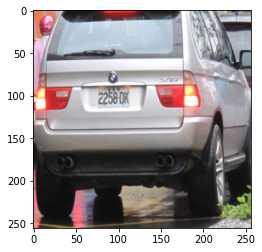

In [149]:
for i,data in enumerate(train_loader):
    plt.imshow(np.transpose(data[1].cpu().detach().numpy(), (1, 2, 0)))

Size of image: torch.Size([6, 3, 256, 256])
Type of image: torch.float32


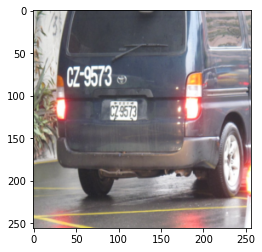

In [140]:
for imgs in train_loader:
    plt.imshow(np.transpose(imgs[2].cpu().detach().numpy(), (1, 2, 0)))
    print('Size of image:', imgs.size()) 
    print('Type of image:', imgs.dtype)

<Figure size 432x288 with 0 Axes>